## Fractional Differentiation Implementation

In [11]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# The idea of this project is to implement "fractional differentiation" in time series
# to be able to better capture the signals in Financial Time Series data

In [13]:
def get_weights_ffd(d, thres=1e-5, max_size=10000):
    
    """
    Objective: generate weights for fractional differentiation using binomial expansion
    
    Parameters: 
    
    1) d: Differentiation order (between 0 and 1)
    2) thres: Threshold for truncating weights
    3) max_size: Max size for weights in case threshold doesn't apply

    """
    
    w, k = [1.], 1
    while True:
        w_ = -w[-1] * (d - k + 1) / k
        if abs(w_) < thres or k >= max_size:
            break
        w.append(w_)
        k += 1
    return np.array(w[::-1]).reshape(-1, 1)


def frac_diff_ffd(series, d, thres=1e-5, max_size=100):

    """
    
    Objective: Perform fractional differentiation with a fixed window of length based on threshold
    
    Parameters: 
    
    1) series: Time series data 
    
    2) d: Differentiation order

    3) thres: Threshold to decide how many weights to use
    
    4) max_size: The maximum size of the weight window.
    
    """
    
    series = series.dropna()
    
    weights = get_weights_ffd(d, thres, min(len(series), max_size))
    
    output = []
    
    for i in range(len(weights), len(series)):
        window = series[i-len(weights):i]
        dot_product = np.dot(weights.T, window)[0]
        output.append(dot_product)
    
    frac_diff_series = pd.Series(output, index=series.index[len(weights):])
    
    return frac_diff_series



In [14]:
# Let´s look at the results using financial data from yahoo finance (Apple)

apple_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
apple_close = apple_data['Close'].dropna()  # only take the close price

[*********************100%%**********************]  1 of 1 completed


In [15]:
# let´s apply our algorithm:

frac_diff_apple = frac_diff_ffd(apple_close, d=0.4)


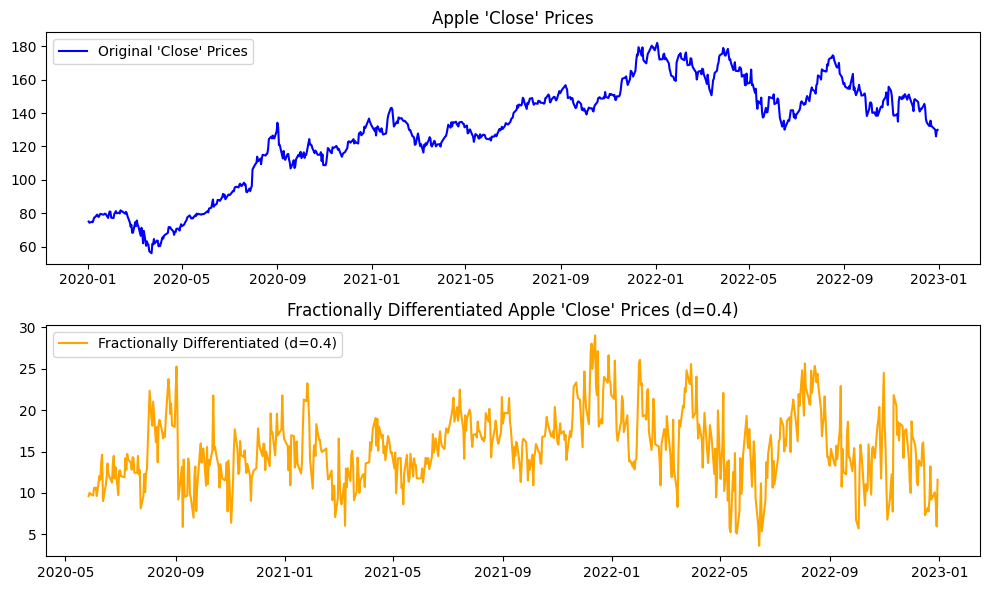

In [16]:
# Let´s plotting the original financial data and the fractionally differenciated one
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(apple_close, label="Original 'Close' Prices", color="blue")
plt.title("Apple 'Close' Prices")
plt.legend(loc="upper left")


plt.subplot(2, 1, 2)
plt.plot(frac_diff_apple, label="Fractionally Differentiated (d=0.4)", color="orange")
plt.title("Fractionally Differentiated Apple 'Close' Prices (d=0.4)")
plt.legend(loc="upper left")


plt.tight_layout()
plt.show()


## Let´s compare it with other implementations to verify: fracdiff

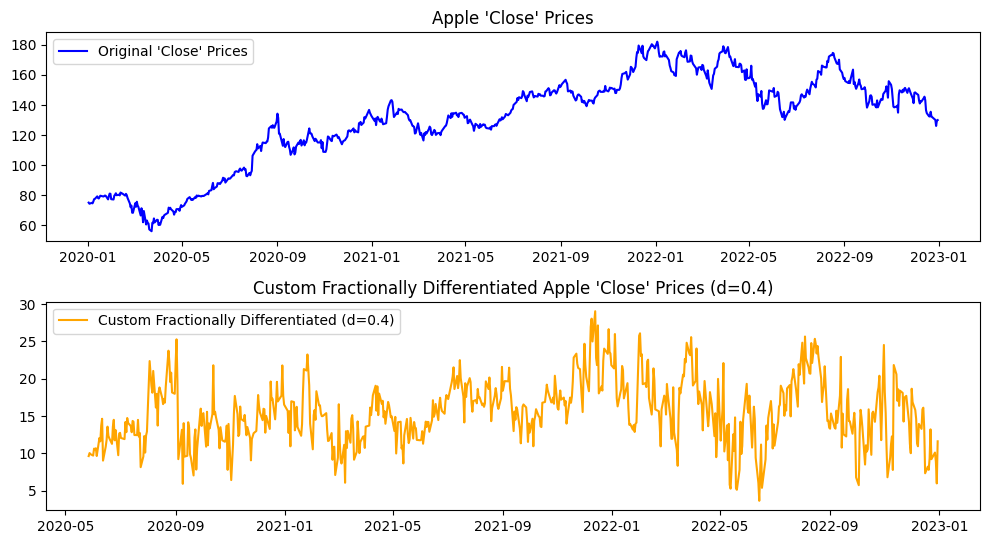

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import fracdiff

frac_diff_apple_custom = frac_diff_ffd(apple_close, d=0.4, max_size=100)

frac_diff_apple_fracdiff = fracdiff.fdiff(apple_close.values, 0.4)

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(apple_close, label="Original 'Close' Prices", color="blue")
plt.title("Apple 'Close' Prices")
plt.legend(loc="upper left")

plt.subplot(3, 1, 2)
plt.plot(frac_diff_apple_custom, label="Custom Fractionally Differentiated (d=0.4)", color="orange")
plt.title("Custom Fractionally Differentiated Apple 'Close' Prices (d=0.4)")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


In [19]:
# The results look quite good. The implementation is correct. In the next step of the proyect, the function will
# be used within the analysis